# Fake News Detection

Fake news denotes a type of yellow press which intentionally presents misinformation or hoaxes spreading through both traditional print news media and recent online social media. In recent years, due to the booming developments of online social networks, fake news for various commercial and political purposes has been appearing in large numbers and widespread in the online world. With deceptive words, online social network users can get infected by these online fake news easily, which has brought about tremendous effects on the offline society already.

So, it is important to detect fake and real news.



## Importing Libraries

In [3]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

## Loading data

We have a csv file named news in which there is a column named label which has two values REAL and FAKE for real news and fake news. This dataset has a shape of 6335×4.

In [4]:
news=pd.read_csv('fake_or_real_news.csv')
news.shape

(6335, 4)

In [5]:
# Counting the number of REAL and FAKE values
Counter(news['label'])    

Counter({'FAKE': 3164, 'REAL': 3171})

### Splitting data 

Splitting the data into training and testing data.

In [6]:

x_train,x_test,y_train,y_test=train_test_split(news['text'],news['label'],test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(5068,)
(1267,)
(5068,)
(1267,)


### TfidfVectorizer
The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.
##### TF (Term Frequency): 
The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

##### IDF (Inverse Document Frequency): 
Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

In [7]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.8)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)
print(x_test.shape)
print(x_train.shape)

(1267, 61478)
(5068, 61478)


## Fitting the model
We have to build a model to accurately classify a piece of news as REAL or FAKE.

We have used six models PassiveAggressiveClassifier, GaussianNB, DecisionTreeClassifier, RandomForestClassifier, SVC, LogisticRegression so as to compare the accuracy of these models. It will help us to find which model fits the data and predict real and fake news accurately.

In [8]:
model1=PassiveAggressiveClassifier(max_iter=300)
model1.fit(x_train,y_train)
model2=GaussianNB()
model2.fit(x_train.toarray(),y_train)
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
model5=SVC()
model5.fit(x_train,y_train)
model6=LogisticRegression()
model6.fit(x_train,y_train)

LogisticRegression()

### Prediction for testing data

We are predicting for testing data with all models. 

In [9]:
y_pred1=model1.predict(x_test)
y_pred2=model2.predict(x_test.toarray())
y_pred3=model3.predict(x_test)
y_pred4=model4.predict(x_test)
y_pred5=model5.predict(x_test)
y_pred6=model6.predict(x_test)

In [10]:
# Calculating accuracy score
acc1=accuracy_score(y_test,y_pred1)
acc2=accuracy_score(y_test,y_pred2)
acc3=accuracy_score(y_test,y_pred3)
acc4=accuracy_score(y_test,y_pred4)
acc5=accuracy_score(y_test,y_pred5)
acc6=accuracy_score(y_test,y_pred6)

labels={'PassiveAggressiveClassifier':acc1,'GaussianNB':acc2,'DecisionTreeClassifier':acc3,'RandomForestClassifier':acc4,
        'SVC':acc5,'LogisticRegression':acc6}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

PassiveAggressiveClassifier : 0.9431728492501973
GaussianNB : 0.8042620363062352
DecisionTreeClassifier : 0.8287292817679558
RandomForestClassifier : 0.8981846882399369
SVC : 0.9352801894238358
LogisticRegression : 0.9226519337016574


PassiveAggressiveClassifier gives the highest accuracy score.

### Data Visualization

Text(0.5, 1.0, 'Fake news')

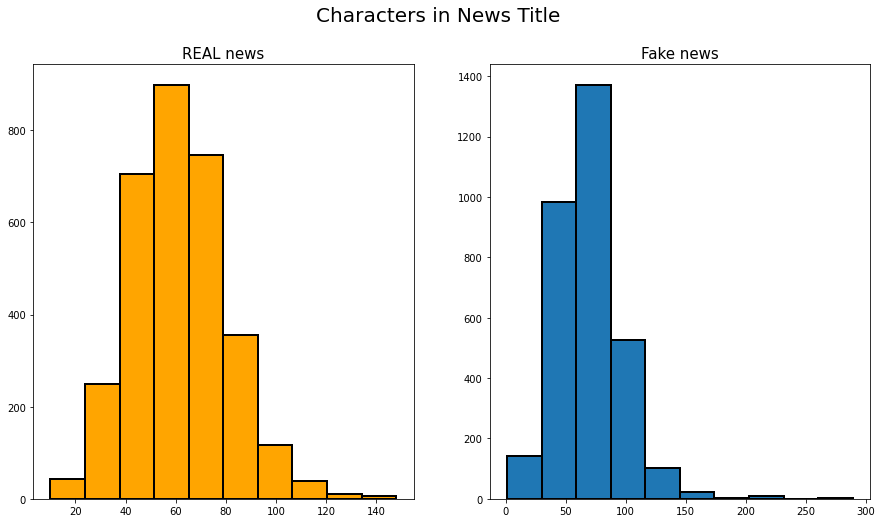

In [11]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=news[news['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news[news['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

Text(0.5, 1.0, 'Fake news')

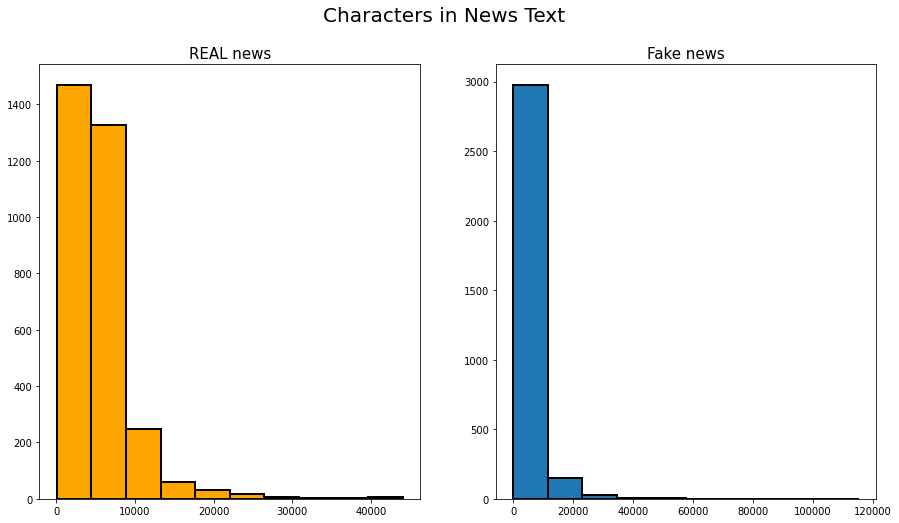

In [12]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Text',fontsize=20)
news_len=news[news['label']=='REAL']['text'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news[news['label']=='FAKE']['text'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

<BarContainer object of 6 artists>

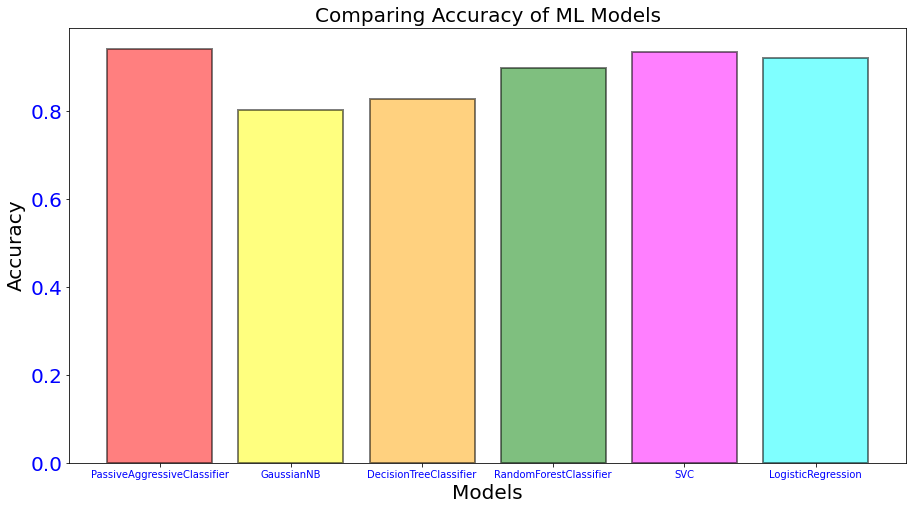

In [13]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','green','magenta','cyan']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)


Calculating confusion matrix to gain insight into the number of false and true negatives and positives.

In [14]:
cm1=confusion_matrix(y_test,y_pred1)
cm2=confusion_matrix(y_test,y_pred2)
cm3=confusion_matrix(y_test,y_pred3)
cm4=confusion_matrix(y_test,y_pred4)
cm5=confusion_matrix(y_test,y_pred5)
cm6=confusion_matrix(y_test,y_pred6)

In [15]:
print('Confusion Matrix for PassiveAggressiveClassifier')
cm1

Confusion Matrix for PassiveAggressiveClassifier


array([[553,  32],
       [ 40, 642]])

Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

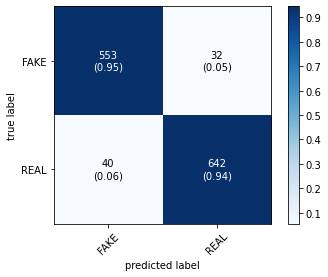

In [16]:
print('Confusion Matrix for PassiveAggressiveClassifier')
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])


In [17]:
print('Confusion Matrix for GaussianNB')
cm2

Confusion Matrix for GaussianNB


array([[451, 134],
       [114, 568]])

Confusion Matrix for GaussianNB


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

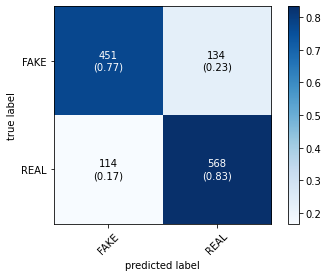

In [18]:
print('Confusion Matrix for GaussianNB')
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])


In [19]:
print('Confusion Matrix for DecisionTreeClassifier')
cm3

Confusion Matrix for DecisionTreeClassifier


array([[476, 109],
       [108, 574]])

Confusion Matrix for DecisionTreeClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

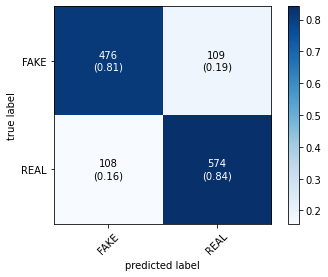

In [20]:
print('Confusion Matrix for DecisionTreeClassifier')
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])


In [21]:
print('Confusion Matrix for RandomForestClassifier')
cm4

Confusion Matrix for RandomForestClassifier


array([[526,  59],
       [ 70, 612]])

Confusion Matrix for RandomForestClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

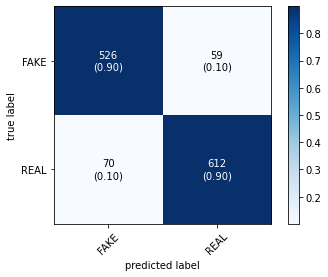

In [22]:
print('Confusion Matrix for RandomForestClassifier')
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])


In [23]:
print('Confusion Matrix for SVC')
cm5

Confusion Matrix for SVC


array([[566,  19],
       [ 63, 619]])

Confusion Matrix for SVC


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

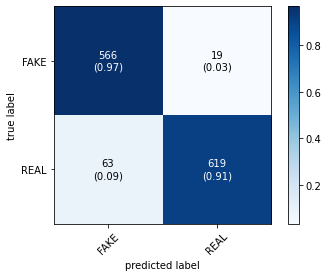

In [24]:
print('Confusion Matrix for SVC')
plot_confusion_matrix(conf_mat=cm5,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])


In [25]:
print('Confusion Matrix for LogisticRegression')
cm6

Confusion Matrix for LogisticRegression


array([[561,  24],
       [ 74, 608]])

Confusion Matrix for LogisticRegression


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

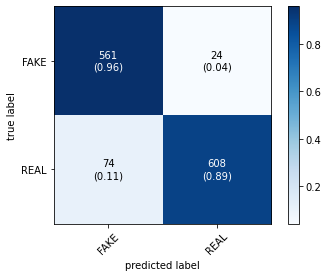

In [26]:
print('Confusion Matrix for LogisticRegression')
plot_confusion_matrix(conf_mat=cm6,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])
